In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm

In [ ]:
def arima_weekly_forecast(train_series, forecast_weeks=12):
    """
    Fits ARIMA on weekly sales data and forecasts future sales.

    Parameters:
    - train_series: pandas Series of weekly sales (indexed by week)
    - forecast_weeks: int, how many weeks ahead to forecast

    Returns:
    - forecast_df: DataFrame with future weeks and predicted sales
    """
    # Fit ARIMA model
    model = pm.auto_arima(
        train_series,
        seasonal=False,
        start_p=1, start_q=1,
        max_p=3, max_q=3,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

    # Forecast
    forecast = model.predict(n_periods=forecast_weeks)

    # Prepare result DataFrame
    future_dates = pd.date_range(
        start=train_series.index.max() + pd.Timedelta(weeks=1),
        periods=forecast_weeks,
        freq='W-MON'
    )

    forecast_df = pd.DataFrame({
        "week": future_dates,
        "Predicted_Sales": forecast
    })

    return forecast_df


In [12]:
df = pd.read_csv('data\weekly_sales.csv', parse_dates = ['week'])

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Asus\AppData\Local\Temp\ipykernel_14752\614054085.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv('data\weekly_sales.csv', parse_dates = ['week'])


In [13]:
df = df.sort_values('week')
df.set_index('week', inplace = True)
ts_train = df['weekly_quantity']

In [14]:
forecast_df = arima_weekly_forecast(ts_train, forecast_weeks = 12)
forecast_df

,week,Predicted_Sales
2024-04-29,2024-04-29,9451.490566
2024-05-06,2024-05-06,9451.490566
2024-05-13,2024-05-13,9451.490566
2024-05-20,2024-05-20,9451.490566
2024-05-27,2024-05-27,9451.490566
2024-06-03,2024-06-03,9451.490566
2024-06-10,2024-06-10,9451.490566
2024-06-17,2024-06-17,9451.490566
2024-06-24,2024-06-24,9451.490566
2024-07-01,2024-07-01,9451.490566


In [15]:
import matplotlib.pyplot as plt

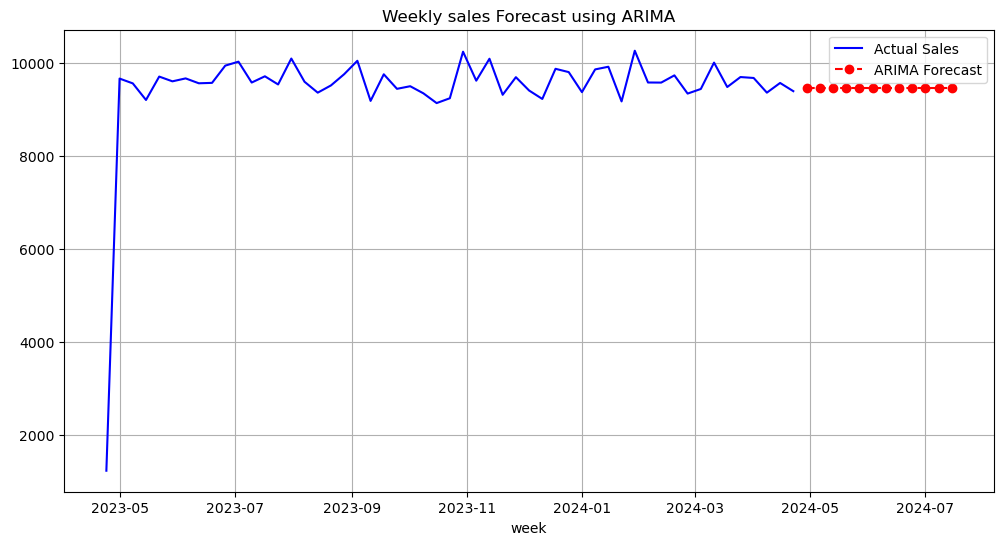

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.index, df['weekly_quantity'], label = 'Actual Sales', color = 'blue')

plt.plot(forecast_df['week'], forecast_df['Predicted_Sales'],
         label = 'ARIMA Forecast', color = 'red', linestyle = '--',marker = 'o')

plt.xlabel('week')
plt.ylabel = ('Weekly Quantity Sold')
plt.title('Weekly sales Forecast using ARIMA')
plt.legend()
plt.grid(True)
plt.savefig('images/Weekly Sales Forecast using ARIMA.png')
plt.show()

In [18]:
forecast_df.to_csv('data/arima_weekly_forecast.csv', index = False)